In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

### We will use california housing dataset for our network

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()  # this is a dictionary

No. of instances = 20640

there are 8 features in this model and the target

#### for more details refer the url
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [5]:
print(housing.feature_names) # feature names

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### Now we will split our data

In [6]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,Y_train_full,Y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,Y_train,Y_valid=train_test_split(X_train_full,Y_train_full,random_state=42)

25% data becomes test data and rest becomes training data

out of that 75% , 25% goes into validation and rest goes to training data

### Now we will standardize the data (feature scaling)
We subtract the mean with the original values and then we divide it by the variance
this is done so that the cost function curve converges faster giving faster results

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
X_train.shape

(11610, 8)

### Now we will create the structure for our Regression NN

In [13]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [19]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3), # schocastic gradient descent
              metrics=['mae'])  # mean absolute error

### We will now train the model

In [20]:
model_history=model.fit(X_train,Y_train,epochs=20,validation_data=(X_valid,Y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 253us/sample - loss: 1.8373 - mae: 0.9957 - val_loss: 2.8236 - val_mae: 0.7273
Epoch 2/20
11610/11610 [==============================] - 1s 123us/sample - loss: 0.7880 - mae: 0.6680 - val_loss: 0.7494 - val_mae: 0.6224
Epoch 3/20
11610/11610 [==============================] - 2s 138us/sample - loss: 0.6797 - mae: 0.6156 - val_loss: 0.6271 - val_mae: 0.5881
Epoch 4/20
11610/11610 [==============================] - 2s 129us/sample - loss: 0.6262 - mae: 0.5879 - val_loss: 0.5998 - val_mae: 0.5649
Epoch 5/20
11610/11610 [==============================] - 2s 135us/sample - loss: 0.5843 - mae: 0.5658 - val_loss: 0.5389 - val_mae: 0.5423
Epoch 6/20
11610/11610 [==============================] - 1s 122us/sample - loss: 0.5489 - mae: 0.5463 - val_loss: 0.5217 - val_mae: 0.5258
Epoch 7/20
11610/11610 [==============================] - 2s 132us/sample - loss: 0.5206 - mae: 0.5327 - val_lo

In [21]:
mae_test=model.evaluate(X_test,Y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

### We will now visualise the model loss

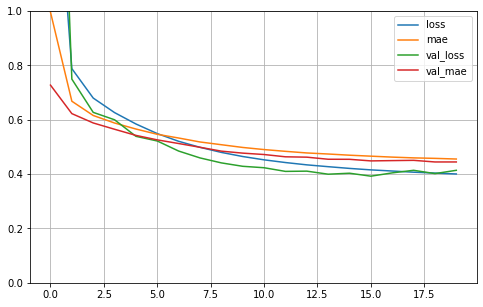

In [22]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

### Now we will test the model

In [23]:
X_new=X_test[:3]


In [24]:
Y_pred=model.predict(X_new)
print(Y_pred)
print(Y_test[:3])

[[0.8026427]
 [1.7266891]
 [3.393253 ]]
[0.477   0.458   5.00001]


### Saving the model

In [25]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
